# Breast Cancer Prediction

*Importing some libraries and the required data as follows.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
data = pd.read_csv('breastcancer_data.csv')

Let's carry out some general inspection of the data.

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.drop('Unnamed: 32', axis=1, inplace=True)     #Useless column

In [7]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
data.shape

(569, 32)

In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


It can be observed that the target column `diagnosis` is a categorical column. 

In [6]:
np.unique(data['diagnosis'])

array(['B', 'M'], dtype=object)

- M ---- Malignant <br>
- B ---- Benign

In [10]:
data['diagnosis'] = data['diagnosis'].apply(lambda x : 1 if x == 'B' else 0)

In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


It can be observed that there are some columns that are on a high scale. Therefore, it is necessary to transform all the columns to a similar scale.

In [12]:
cols_to_transform = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst',
                     'texture_worst', 'perimeter_worst', 'area_worst']

These are the columns that will be transformed. But before that, let's divide the data into a train set and a test set.

In [15]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.8, random_state=100)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[cols_to_transform] = scaler.fit_transform(df_train[cols_to_transform])

In [19]:
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
58,857810,1,0.287236,0.308997,0.268261,0.162895,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,0.4040,1.214,0.085984,0.050420,0.007491,0.008593,0.000692,0.004167,0.02190,0.002990,0.250099,0.263428,0.233758,0.144813,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289
554,924632,1,0.279190,0.641522,0.267501,0.157419,0.08123,0.05824,0.061950,0.023430,0.1566,0.05708,0.2116,1.360,0.034448,0.019329,0.008412,0.021530,0.038980,0.007620,0.01695,0.002801,0.236602,0.627530,0.225541,0.135443,0.1227,0.16200,0.243900,0.06493,0.2372,0.07242
351,899667,0,0.415022,0.305882,0.437496,0.261134,0.12430,0.23640,0.291400,0.124200,0.2375,0.07603,0.5204,1.324,0.127571,0.085617,0.009329,0.065590,0.099530,0.022830,0.05543,0.007330,0.374355,0.315250,0.404895,0.240893,0.1550,0.50460,0.687200,0.21350,0.4245,0.10500
136,868223,1,0.223816,0.217647,0.213738,0.118913,0.10510,0.06095,0.035920,0.026000,0.1339,0.05945,0.4489,2.508,0.117245,0.053138,0.006578,0.013800,0.026620,0.013070,0.01359,0.003707,0.214371,0.350607,0.209813,0.119275,0.1271,0.10280,0.104600,0.06968,0.1712,0.07343
497,914580,1,0.259785,0.239792,0.253334,0.142900,0.08928,0.07630,0.036090,0.023690,0.1526,0.06046,0.1532,0.781,0.022708,0.009846,0.003796,0.013710,0.013460,0.007096,0.01536,0.001541,0.243351,0.319838,0.248900,0.139270,0.1276,0.25060,0.202800,0.10530,0.3035,0.07661


Let's make the predictions as follows

In [27]:
X_train = df_train.iloc[:, 2:]
y_train = df_train['diagnosis']

In [40]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
X_test = df_test.iloc[:, 2:]
y_test = df_test['diagnosis']

In [48]:
X_test[cols_to_transform] = scaler.transform(X_test[cols_to_transform])

In [49]:
y_test_pred = model_1.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [53]:
confusion_matrix(y_test, y_test_pred)

array([[47,  2],
       [ 1, 64]], dtype=int64)

In [55]:
round(accuracy_score(y_test, y_test_pred), 2)

0.97

In [57]:
roc_auc_score(y_test, y_test_pred)

0.9718995290423862

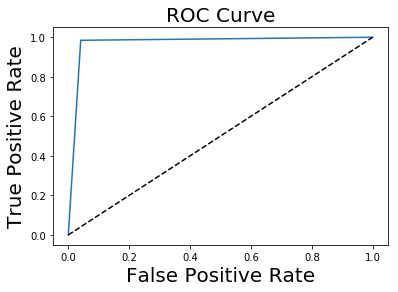

In [74]:
fpr, tpr, thresh = roc_curve(y_test, y_test_pred, drop_intermediate=False)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curve', fontsize=20)
plt.show()

In [75]:
roc_auc_score(y_test, y_test_pred)

0.9718995290423862

In [88]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[47,  2],
       [ 1, 64]], dtype=int64)

In [91]:
TN = confusionMatrix[0,0]
FP = confusionMatrix[0,1]
FN = confusionMatrix[1,0]
TP = confusionMatrix[1,1]

Let's calculate *Sensitivity* and *Specifity* and by specifity determine the *False Positive Rate*as follows.<br>
- $Sensitivity = TP / (TP+FN)$
- $Specificity = TN / (TN+FP)$
- $False Positive Rate = 1-Specificity$

In [102]:
sensitivity = TP/(TP+FN) # True Positive Rate
specificity = TN/(TN+FP) # True Negative Rate
false_positive_rate = 1-specificity
false_negative_rate = FN/(FN+TN)

print(round(sensitivity,2))
print(round(specificity,2))
print(round(false_positive_rate,2))
print(round(false_negative_rate,2))

0.98
0.96
0.04
0.02
